In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
test = pd.read_csv('finalpr.csv')
print("Test data shape:", test.shape)


Test data shape: (740, 7)


In [102]:
test = test.replace(np.nan, 0)

In [103]:
#test.head()

In [104]:
test.price.describe()

count       740.000000
mean      86602.250000
std       88979.352082
min       21500.000000
25%       35000.000000
50%       50170.000000
75%       90000.000000
max      700000.000000
Name: price, dtype: float64

In [105]:
test.area.astype(int)
test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
rooms        740 non-null int64
serie        740 non-null int64
area         740 non-null int64
furniture    740 non-null int64
floor        740 non-null int64
region       740 non-null object
price        740 non-null int64
dtypes: int64(6), object(1)
memory usage: 40.5+ KB


In [106]:
test.describe()

,rooms,serie,area,furniture,floor,price
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,1.671622,0.189189,37.989189,0.929730,4.768919,86602.250000
std,0.815284,0.391924,11.191887,0.255775,2.693521,88979.352082
min,1.000000,0.000000,12.000000,0.000000,1.000000,21500.000000
25%,1.000000,0.000000,31.000000,1.000000,2.000000,35000.000000
50%,1.000000,0.000000,35.000000,1.000000,5.000000,50170.000000
75%,2.000000,0.000000,44.000000,1.000000,7.000000,90000.000000
max,3.000000,1.000000,135.000000,1.000000,12.000000,700000.000000


In [107]:
test.columns

Index(['rooms', 'serie', 'area', 'furniture', 'floor', 'region', 'price'], dtype='object')

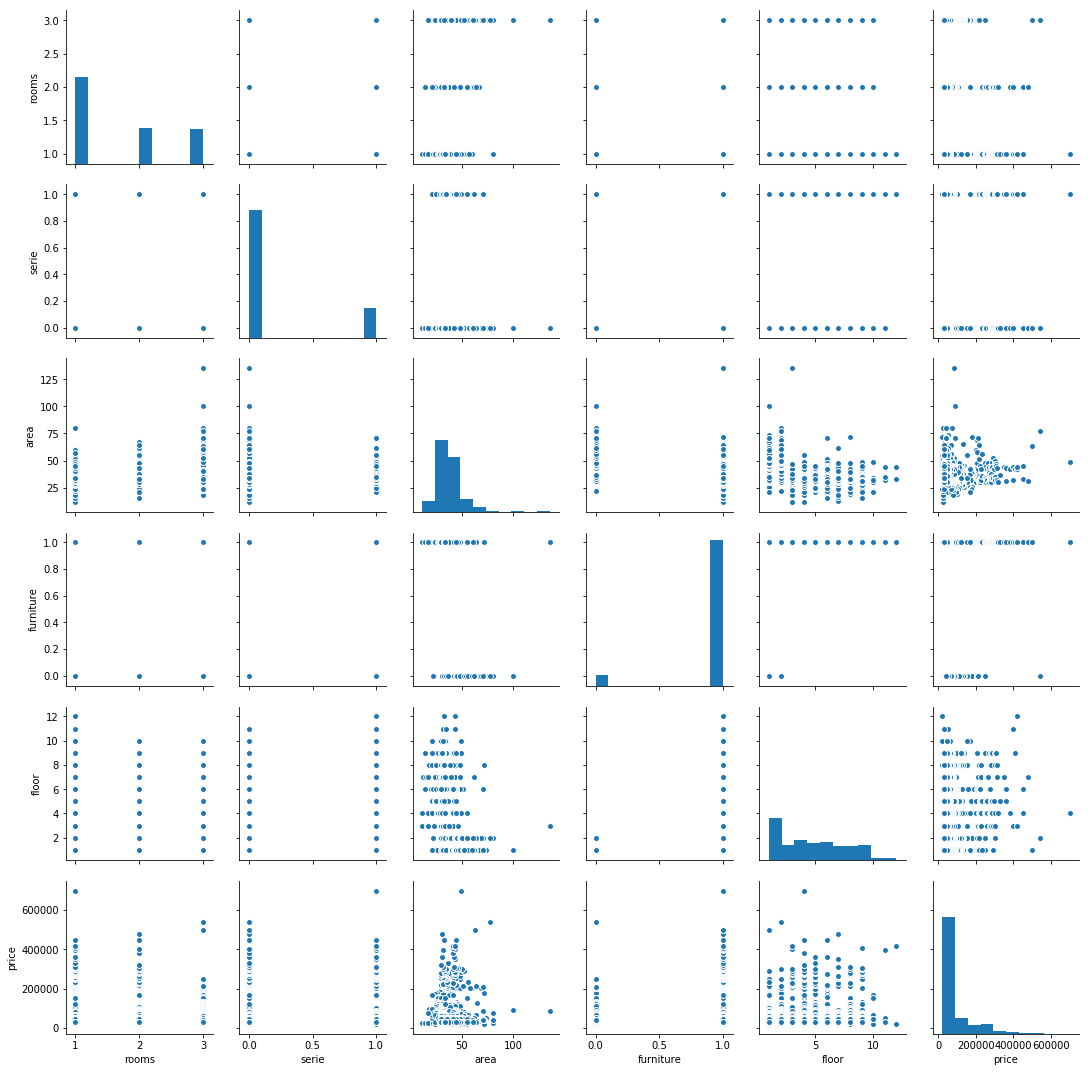

In [108]:
sns.pairplot(test)

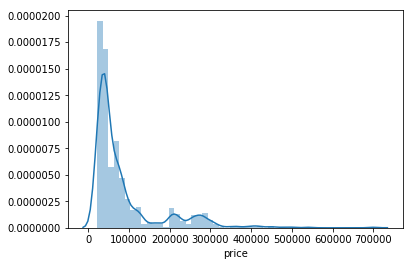

In [109]:
sns.distplot(test['price'])

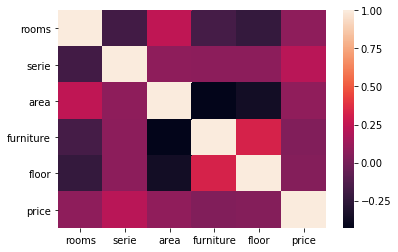

In [110]:
sns.heatmap(test.corr())

In [111]:
X=test[['rooms', 'serie','floor','furniture']]
y=test['price']
        

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lm = LinearRegression()

In [116]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
print(lm.intercept_)

16746.2947517


In [118]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
rooms,16141.332236
serie,58337.531951
floor,1484.319299
furniture,26049.133550


In [119]:
predictions = lm.predict(X_test)

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
forest_reg = RandomForestRegressor(random_state=55)

In [122]:
forest_reg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=55, verbose=0, warm_start=False)

In [123]:
predictions=forest_reg.predict(X_test)
predictions

array([  55231.70477556,   43662.77750467,   31447.60320256,
         31447.60320256,   43662.77750467,   45923.25668261,
        144787.71579992,   77269.25720845,   71691.16161616,
         68601.70799582,   67908.77372244,   88038.13592653,
         67812.7541168 ,   68601.70799582,   61162.61190676,
         67908.77372244,   71691.16161616,   43662.77750467,
        116153.81822449,   31808.75      ,  116153.81822449,
         56546.66666667,  101470.96475257,   23126.10897436,
         90517.44117647,   61162.61190676,   78411.44833894,
         55231.70477556,  120467.11483157,   71691.16161616,
         43662.77750467,  191257.57215007,   31808.75      ,
        146082.43631369,   77366.66666667,  169430.06565657,
        116153.81822449,   43662.77750467,   43662.77750467,
        144787.71579992,  191257.57215007,  122278.3022533 ,
         92549.93040293,   96778.0952381 ,   59708.97905697,
         32845.2041625 ,   61162.61190676,   55231.70477556,
         67908.77372244,

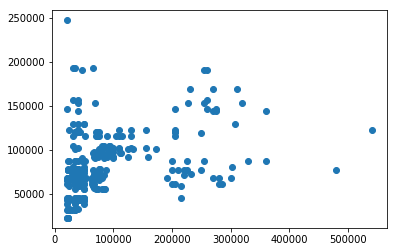

In [124]:
plt.scatter(y_test,predictions)

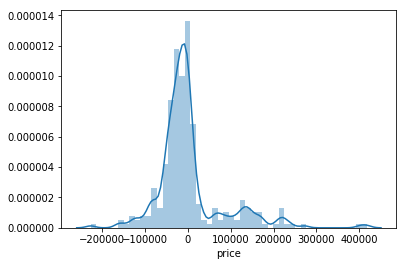

In [125]:
sns.distplot((y_test-predictions),bins=50);

In [126]:
from sklearn import metrics

In [127]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 49589.2627199
MSE: 6250530119.96
RMSE: 79060.2942061
